In [1]:
import sympy as sp

In [2]:
a, b=sp.symbols("a b")

In [8]:
L = (1000*a+b-20)**2+(1500*a+b-35)**2+(1200*a+b-30)**2
L

(1000*a + b - 20)**2 + (1200*a + b - 30)**2 + (1500*a + b - 35)**2

In [7]:
sp.simplify(L)

4690000*a**2 + 7400*a*b - 217000*a + 3*b**2 - 170*b + 2525

In [9]:
import numpy as np

In [12]:
A = np.array([
    [1000, 1],
    [1500, 1],
    [1200, 1]
])
A

array([[1000,    1],
       [1500,    1],
       [1200,    1]])

In [13]:
y = np.array([20, 35, 30])

In [16]:
ATA = A.T@A

In [17]:
ATy = A.T@y

In [18]:
ATy

array([108500,     85])

In [20]:
theta = np.linalg.solve(ATA, ATy)

In [21]:
a, b = theta

In [22]:
x = np.linspace(800, 1700, 1000)

In [23]:
import matplotlib.pyplot as plt

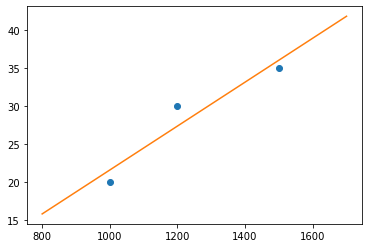

In [27]:
plt.plot(A[:,0], y, "o")
plt.plot(x, a*x+b);

In [28]:
X = np.array([1,2,3,4])
Y = np.array([1,1,3,3])

In [30]:
A = np.vstack([X**2, X, np.ones_like(X)]).T
A

array([[ 1,  1,  1],
       [ 4,  2,  1],
       [ 9,  3,  1],
       [16,  4,  1]])

In [35]:
theta_2 = np.linalg.solve(A.T@A, A.T@Y)

In [36]:
A = np.vstack([X**3,X**2,X,np.ones_like(X)]).T
A

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

In [37]:
theta_3 = np.linalg.solve(A.T@A, A.T@Y)

In [38]:
theta_3

array([ -0.66666667,   5.        , -10.33333333,   7.        ])

In [39]:
a, b, c,d = theta_3

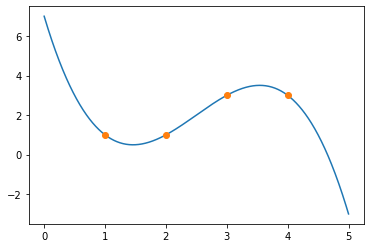

In [43]:
ix = np.linspace(0, 5 ,1000)
plt.plot(ix, a*ix**3+b*ix**2+c*ix+d)
plt.plot(X, Y, "o")

In [59]:
def model(x):
    return 0.5*x**2+6*x+4

In [60]:
X = np.linspace(-20, 20, 1001)
Y = model(X) + np.random.randn(len(X))*100


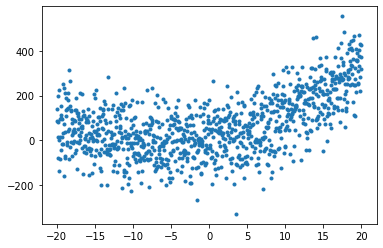

In [61]:
plt.plot(X, Y, ".")

In [64]:
mask = np.random.random(len(X)) > 0.2

In [65]:
X_test = X[mask]
Y_test = Y[mask]

In [67]:
X_train = X[np.invert(mask)]
Y_train = Y[np.invert(mask)]

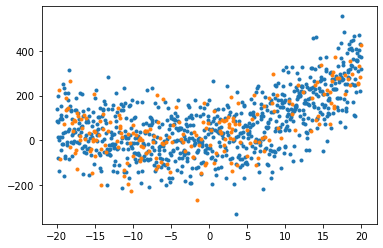

In [68]:
plt.plot(X_test, Y_test, ".")
plt.plot(X_train, Y_train, ".")

In [117]:
def regression_n(X, Y, n):
    A = [X**i for i in range(n, -1, -1)]
    A = np.vstack(A).T
    #print(A)
    ATA = A.T@A
    ATY = A.T@Y
    theta = np.linalg.solve(ATA, ATY)
    return theta

In [143]:
theta = regression_n(X_train, Y_train, 15)
#theta

In [144]:
def predict(X, theta):
    sum = np.zeros_like(X,dtype=float)
    #print(theta)
    for i in range(len(theta)):
        j = len(theta) - i -1
        sum += theta[i]*X**j

    return sum

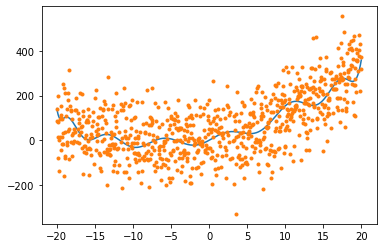

In [146]:
plt.plot(X, predict(X, theta))
plt.plot(X_test, Y_test, ".")